Generación de forecast de depósitos para 6 siguientes meses.
# Descricpión del data set
# cargar datos

In [2]:
import pandas as pd
import numpy as np
import sklearn as sks
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("Copia de dataset.csv", sep =";")
print(data)
data.shape #(6792, 13)

      Unnamed: 0  ID_transaccion     Nombre cliente monto de transacción  \
0              0               1       Rosa Escobar              2986,05   
1              1               2  Claudia Hernández              3666,48   
2              2               3  Francisco Morales              1702,75   
3              3               4       José Mendoza               433,29   
4              4               5       Tomás Ortega               688,78   
...          ...             ...                ...                  ...   
6787        6787            6996      María Córdoba              2662,85   
6788        6788            6997     Pedro Martínez              1078,42   
6789        6789            6998       Luis Sánchez              1280,21   
6790        6790            6999        Emilia Cruz                 1,56   
6791        6791            7000       María Campos              4971,03   

     tipo transaccion fecha transacción saldo actual sucursal-origen  \
0            de

(6792, 13)

# procesamiento de datos

In [4]:
# verificiación de valores perdidos
pd.isnull(data).sum()

Unnamed: 0                 0
ID_transaccion             0
Nombre cliente             0
monto de transacción       0
tipo transaccion           0
fecha transacción          0
saldo actual               0
sucursal-origen            0
sucursal-destino           0
Unnamed: 9              6792
Unnamed: 10             6792
Unnamed: 11             6792
Unnamed: 12             6792
dtype: int64

In [5]:
# se toman las columnas donde is hay información
data =data.drop(columns=['Unnamed: 0','Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12'])
pd.isnull(data).sum()

ID_transaccion          0
Nombre cliente          0
monto de transacción    0
tipo transaccion        0
fecha transacción       0
saldo actual            0
sucursal-origen         0
sucursal-destino        0
dtype: int64

In [6]:
print(data.dtypes)

ID_transaccion           int64
Nombre cliente          object
monto de transacción    object
tipo transaccion        object
fecha transacción       object
saldo actual            object
sucursal-origen         object
sucursal-destino        object
dtype: object


In [7]:
data['monto de transacción'] = data['monto de transacción'].str.replace(',','.')
data['monto de transacción']=data['monto de transacción'].astype(float)

In [8]:
data['saldo actual'] = data['saldo actual'].str.replace(',','.')
data['saldo actual']=data['saldo actual'].astype(float)

In [9]:
data['fecha transacción'] = '01-' + data['fecha transacción']


In [10]:

data['fecha transacción'] = pd.to_datetime(data['fecha transacción'], format='%d-%b-%y')
print(data)

      ID_transaccion     Nombre cliente  monto de transacción  \
0                  1       Rosa Escobar               2986.05   
1                  2  Claudia Hernández               3666.48   
2                  3  Francisco Morales               1702.75   
3                  4       José Mendoza                433.29   
4                  5       Tomás Ortega                688.78   
...              ...                ...                   ...   
6787            6996      María Córdoba               2662.85   
6788            6997     Pedro Martínez               1078.42   
6789            6998       Luis Sánchez               1280.21   
6790            6999        Emilia Cruz                  1.56   
6791            7000       María Campos               4971.03   

     tipo transaccion fecha transacción  saldo actual sucursal-origen  \
0            depósito        2022-09-01      39323.76          Ambato   
1              retiro        2022-09-01       1370.29          Ibarra   


In [11]:
data.describe()

,ID_transaccion,monto de transacción,fecha transacción,saldo actual
count,6792.000000,6792.000000,6792,6792.000000
mean,3457.626178,2481.249717,2023-04-05 14:06:34.346289408,16494.442347
min,1.000000,0.680000,2022-01-01 00:00:00,5.740000
25%,1701.750000,1218.650000,2022-08-01 00:00:00,3264.957500
50%,3437.500000,2465.225000,2023-04-01 00:00:00,11691.945000
75%,5201.250000,3746.155000,2023-12-01 00:00:00,27280.725000
max,7000.000000,4999.940000,2024-07-01 00:00:00,88190.610000
std,2020.350117,1450.124526,NaN,15313.564753


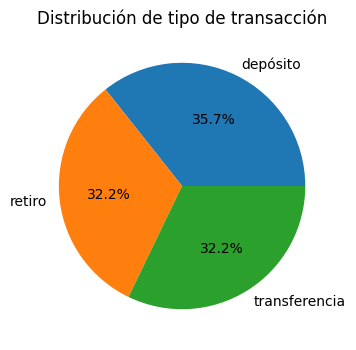

In [12]:
plt.figure(figsize=(8, 4))
data['tipo transaccion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de tipo de transacción')
plt.ylabel('')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4184\1358152791.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['monto de transacción']], labels=['monto transaccion'])


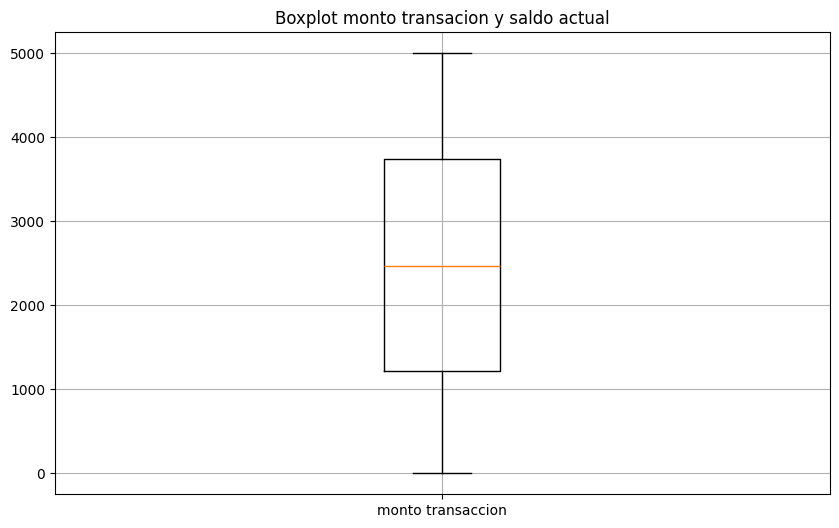

In [13]:
# Crear el box plot usando matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([data['monto de transacción']], labels=['monto transaccion'])
plt.title('Boxplot monto transacion y saldo actual')
plt.grid(True)
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4184\900701236.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['saldo actual']], labels=['saldo actual'])


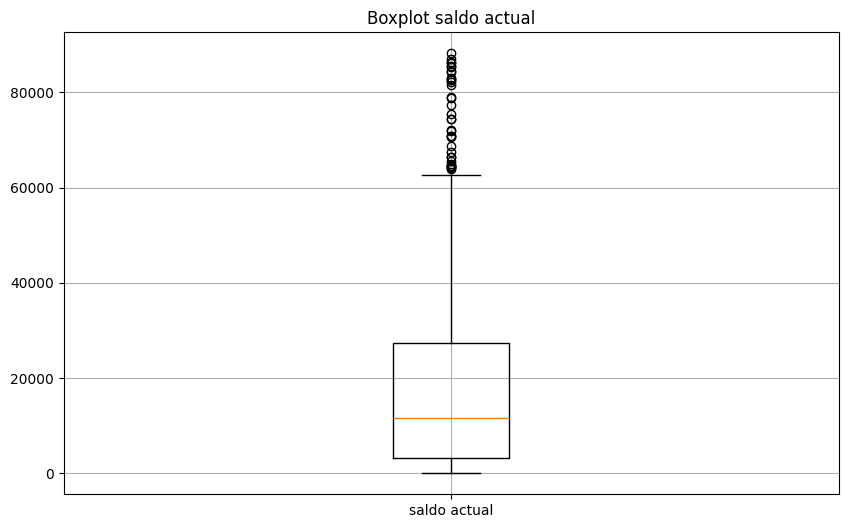

In [14]:
# Crear el box plot usando matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([data['saldo actual']], labels=['saldo actual'])
plt.title('Boxplot saldo actual')
plt.grid(True)
plt.show()

In [15]:
data2 = data[['ID_transaccion',  'saldo actual', 'monto de transacción']]

In [16]:
correlation_matrix = data2.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

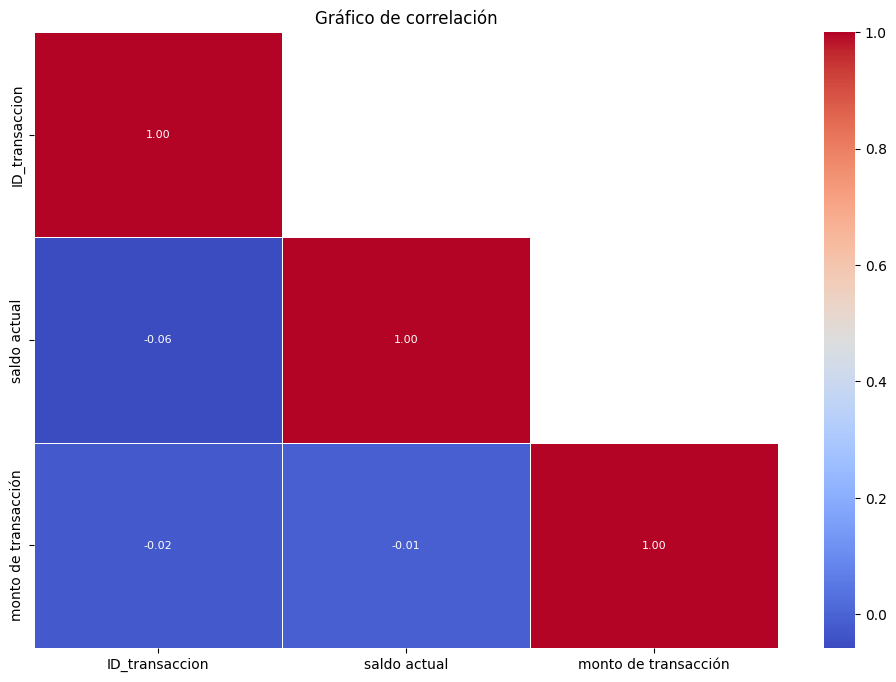

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, annot_kws={"fontsize":8})
plt.title('Gráfico de correlación')
plt.show()

In [18]:
# agrupar valores mensuales
data3 = data[data['tipo transaccion'] == 'depósito']
data3 = data3[['saldo actual', 'monto de transacción','fecha transacción']]

In [19]:
# Establecer la columna de fechas como índice
data3.set_index('fecha transacción', inplace=True)
df_mensual = data3.resample('ME').sum()

In [20]:
# Establecer la columna de fechas como índice
df_mensual.reset_index(inplace=True)

In [21]:
print(df_mensual)

   fecha transacción  saldo actual  monto de transacción
0         2022-01-31    1611239.73             174987.24
1         2022-02-28    1042195.13             143573.01
2         2022-03-31    1883726.58             207072.63
3         2022-04-30    1993002.72             232927.68
4         2022-05-31    1568098.18             195883.90
5         2022-06-30    1484617.22             202718.38
6         2022-07-31    2033431.21             245715.90
7         2022-08-31    1366504.43             196540.72
8         2022-09-30    1829531.95             234102.26
9         2022-10-31    1283294.96             163577.52
10        2022-11-30    1722951.07             172380.41
11        2022-12-31    1343140.63             187915.18
12        2023-01-31    1041718.93             161269.22
13        2023-02-28    1304501.88             165365.99
14        2023-03-31    1932466.02             188307.50
15        2023-04-30    1632350.90             186256.87
16        2023-05-31    1503550

In [22]:
print(df_mensual.dtypes)

fecha transacción       datetime64[ns]
saldo actual                   float64
monto de transacción           float64
dtype: object


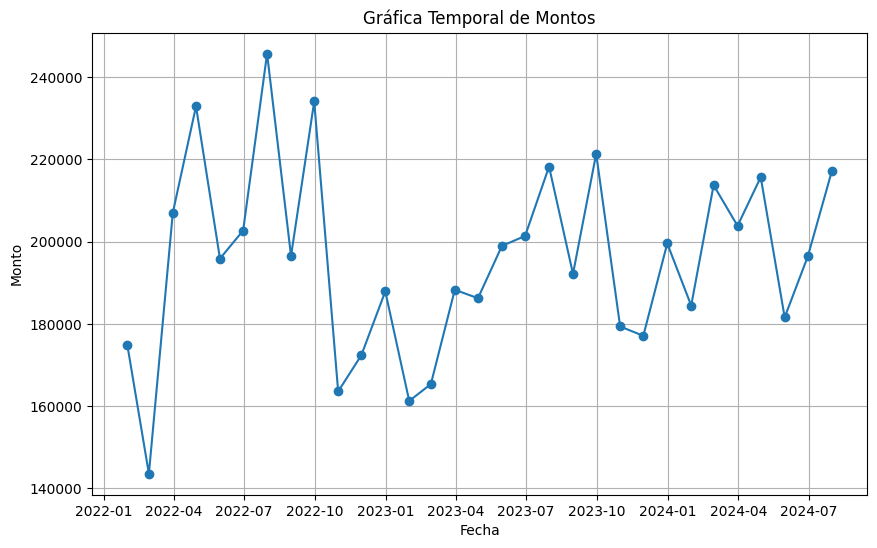

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df_mensual['fecha transacción'], df_mensual['monto de transacción'], marker='o', linestyle='-')
plt.title('Gráfica Temporal de Montos')
plt.xlabel('Fecha')
plt.ylabel('Monto')
plt.grid(True)
plt.show()

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
print(df_mensual)

   fecha transacción  saldo actual  monto de transacción
0         2022-01-31    1611239.73             174987.24
1         2022-02-28    1042195.13             143573.01
2         2022-03-31    1883726.58             207072.63
3         2022-04-30    1993002.72             232927.68
4         2022-05-31    1568098.18             195883.90
5         2022-06-30    1484617.22             202718.38
6         2022-07-31    2033431.21             245715.90
7         2022-08-31    1366504.43             196540.72
8         2022-09-30    1829531.95             234102.26
9         2022-10-31    1283294.96             163577.52
10        2022-11-30    1722951.07             172380.41
11        2022-12-31    1343140.63             187915.18
12        2023-01-31    1041718.93             161269.22
13        2023-02-28    1304501.88             165365.99
14        2023-03-31    1932466.02             188307.50
15        2023-04-30    1632350.90             186256.87
16        2023-05-31    1503550

In [26]:
# Ajustar el modelo Holt-Winters

data_hw = df_mensual[['fecha transacción','monto de transacción']]

model = ExponentialSmoothing(data_hw['monto de transacción'], 
                             seasonal='add', 
                             seasonal_periods=12)
fit = model.fit(optimized=True, use_brute=True)  # Prueba con use_brute=True

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [27]:
# normalizacion de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_mensual['monto de transacción_scaled'] = scaler.fit_transform(df_mensual[['monto de transacción']])


In [28]:
df_mensual.columns

df_scaled = df_mensual
model = ExponentialSmoothing(df_scaled['monto de transacción_scaled'], 
                             seasonal='add', 
                             seasonal_periods=12)
fit = model.fit(optimized=True, use_brute=True)  # Prueba con use_brute=True


In [29]:

# Realizar el pronóstico de 6 meses
forecast_scaled = fit.forecast(steps=6)


In [30]:
# Desnormalizar los datos para el pronóstico
# Guardar los parámetros de escala
mean = scaler.mean_[0]
std = scaler.scale_[0]

# Desnormalizar el pronóstico
forecast = forecast_scaled * std + mean
print(forecast)

31    194359.152919
32    227736.317638
33    171481.093220
34    174745.392378
35    193746.050679
36    173577.823597
dtype: float64


In [31]:
start_date = '2024-08-31'
forecast_index = pd.date_range(start=start_date, periods=6, freq='M')

# unir data forecast

df_forecast = pd.DataFrame({'fecha' : forecast_index,
                           'forecast': forecast})

print(df_forecast)



        fecha       forecast
31 2024-08-31  194359.152919
32 2024-09-30  227736.317638
33 2024-10-31  171481.093220
34 2024-11-30  174745.392378
35 2024-12-31  193746.050679
36 2025-01-31  173577.823597


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4184\1514877631.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=start_date, periods=6, freq='M')


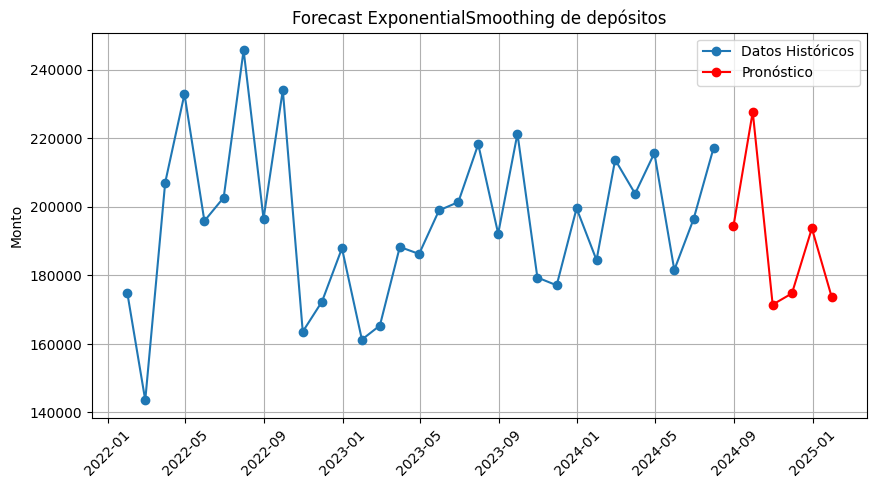

In [36]:
plt.figure(figsize=(10, 5))  # Ajusta el ancho y alto según lo necesites

# Graficar datos históricos
plt.plot(df_mensual['fecha transacción'], df_mensual['monto de transacción'], marker='o', linestyle='-', label='Datos Históricos')

# Graficar pronóstico
plt.plot(df_forecast['fecha'], df_forecast['forecast'], marker='o', linestyle='-', color='red', label='Pronóstico')

# Añadir etiquetas y título
plt.title('Forecast ExponentialSmoothing de depósitos')
plt.ylabel('Monto')
plt.legend()
plt.grid(True)

# Girar etiquetas del eje x
plt.xticks(rotation=45)
# Mostrar la gráfica
plt.show()